In [3]:
import pandas as pd
df = pd.read_csv('../../data/kaggle_20m/movie_genres_ratings.csv')

                                               title  predicted_rating
9005   Life On A String (Bian chang Bian Zou) (1991)               5.0
9281                                   Monday (2000)               4.5
12559                 Aerial, The (La antena) (2007)               4.5
14661                         Dead Time: Kala (2007)               4.5
24702                        The Bloody Olive (1997)               4.5
Decision Tree MSE on Test Set: 0.3959
Decision Tree MAE on Test Set: 0.4663


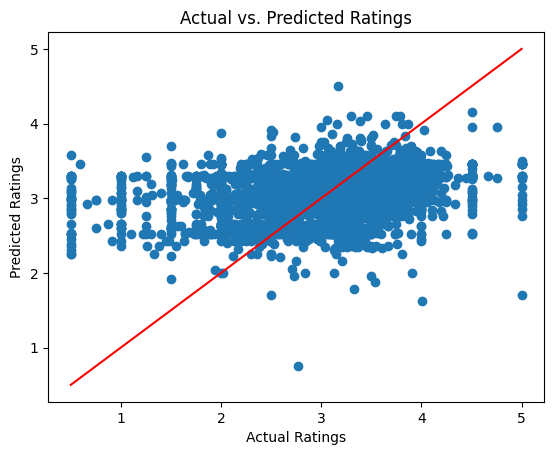

Feature: Action, Importance: 0.0403
Feature: Adventure, Importance: 0.0339
Feature: Animation, Importance: 0.0191
Feature: Children, Importance: 0.0183
Feature: Comedy, Importance: 0.0419
Feature: Crime, Importance: 0.0235
Feature: Documentary, Importance: 0.1926
Feature: Drama, Importance: 0.1322
Feature: Fantasy, Importance: 0.0316
Feature: Film-Noir, Importance: 0.0140
Feature: Horror, Importance: 0.2616
Feature: IMAX, Importance: 0.0161
Feature: Musical, Importance: 0.0238
Feature: Mystery, Importance: 0.0311
Feature: Romance, Importance: 0.0288
Feature: Sci-Fi, Importance: 0.0278
Feature: Thriller, Importance: 0.0266
Feature: War, Importance: 0.0247
Feature: Western, Importance: 0.0120


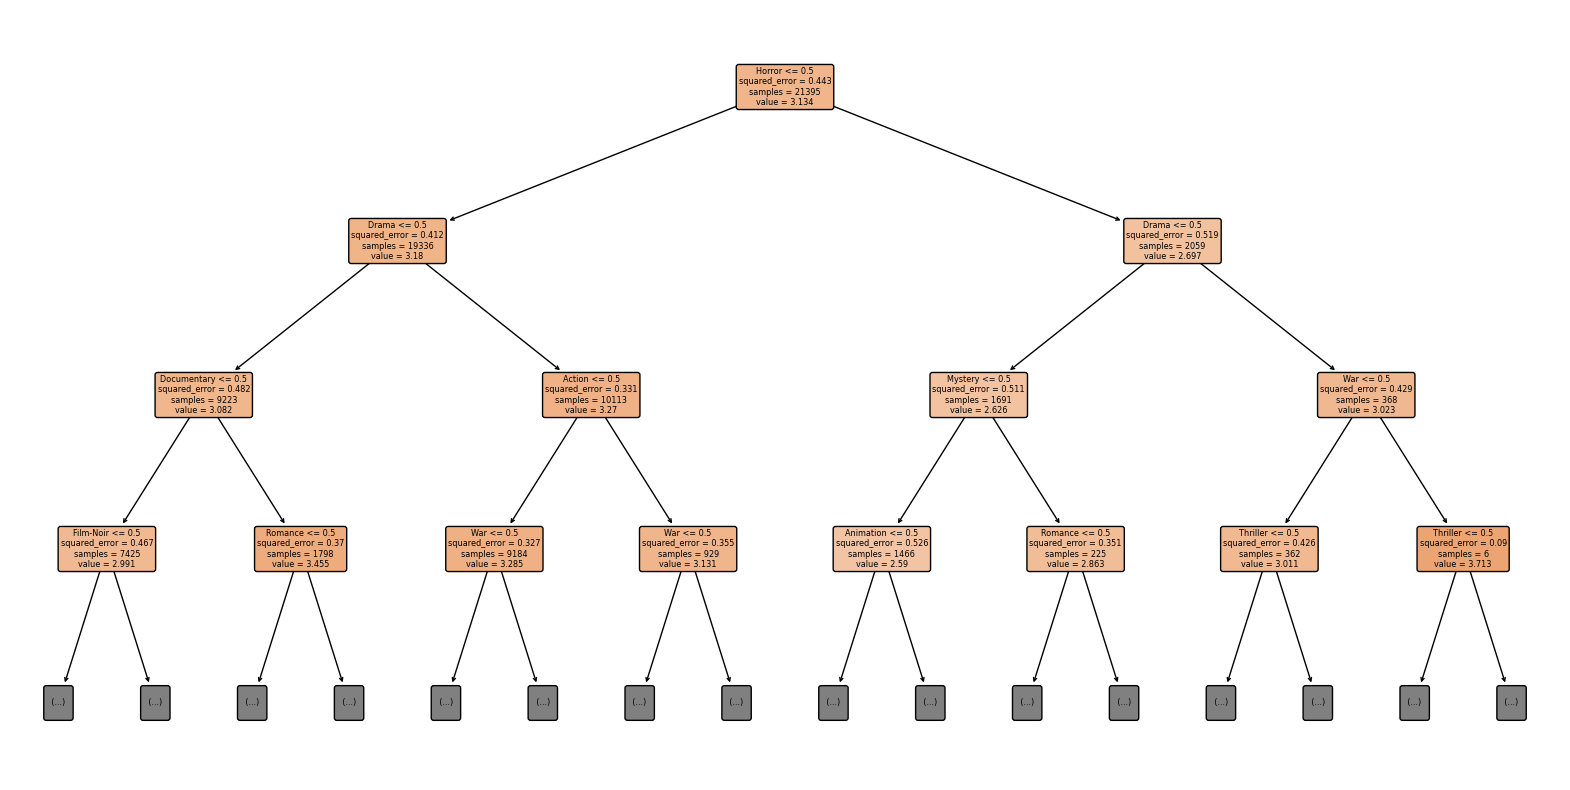

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Splitting features and target variable
X = df.drop(columns=['movieId', 'title', 'rating'])
y = df['rating']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Recommend movies
def recommend_movies(model, user_data, df, top_n=5):
    unseen_movies = df[~df['movieId'].isin(user_data['movieId'])]
    features = unseen_movies.drop(columns=['movieId', 'title', 'rating'])
    predicted_ratings = model.predict(features)
    unseen_movies = unseen_movies.assign(predicted_rating=predicted_ratings)
    return unseen_movies.nlargest(top_n, 'predicted_rating')[['title', 'predicted_rating']]

user_data = df[df['title'].isin(['Toy Story (1995)', 'Jumanji (1995)'])]
recommendations = recommend_movies(dt_model, user_data, df)
print(recommendations)

# Evaluate the model
# MSE
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree MSE on Test Set: {dt_mse:.4f}")

# MAE
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f"Decision Tree MAE on Test Set: {dt_mae:.4f}")

# Visualize the Predictions
plt.scatter(y_test, dt_predictions)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

# Feature Importance
feature_importances = dt_model.feature_importances_
features = X.columns
for feature, importance in zip(features, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

# Inspect the Tree (for smaller trees)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.show()


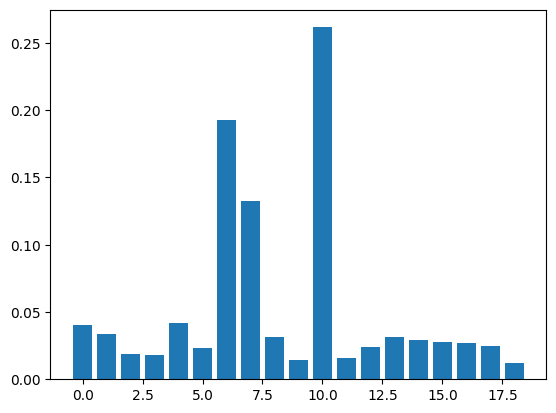

In [5]:
# plot feature importance
from matplotlib import pyplot
pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
pyplot.show()

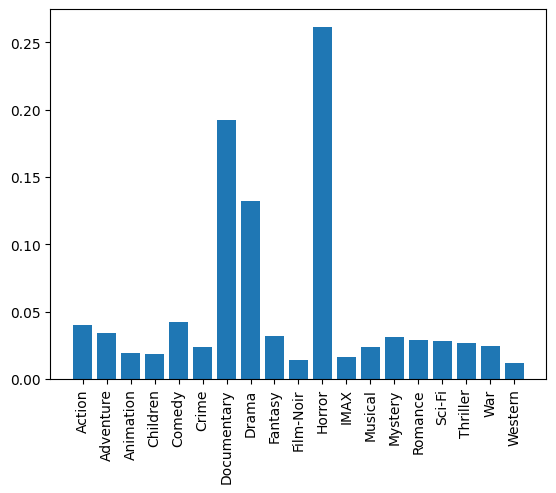

In [6]:
# plot feature importance with feature names
from matplotlib import pyplot
pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
pyplot.xticks([x for x in range(len(feature_importances))], X.columns, rotation='vertical')
pyplot.show()